### 算法原理
KNN：k近邻算法（K Nearest Neighbors）

KNN算法是一种简单高效的机器学习算法，它基于“最近邻”的概念。KNN算法的基本思想是，在给定新的数据点时，通过比较新数据点与已知数据点的相似度，来确定新数据点的类别或值。

KNN算法的步骤如下：

1. 计算新数据点与已知数据点的距离。

2. 选取距离新数据点最近的K个数据点。

3. 根据这K个数据点的类别或值，确定新数据点的类别或值。

### 通俗来说，“物以类聚人以群分”。新数据以最近的既有X的数据判断自己的所属。
KNN不需要训练，所有计算都是在测试集中进行！  
KNN三要素：  
1. 距离测算
2. K值选择
3. 分类决策准则

## 1. 距离测算

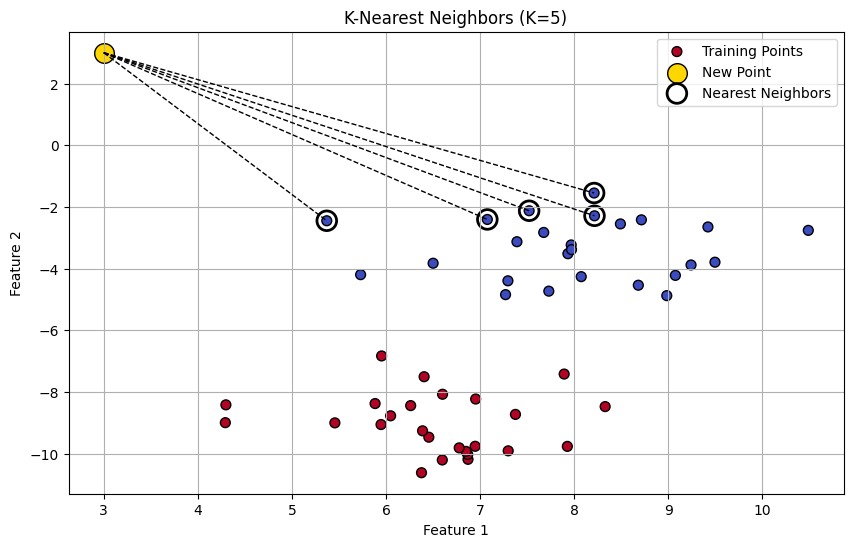

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier

# 生成模拟数据
X, y = make_blobs(n_samples=50, centers=2, random_state=6)

# 定义一个新的样本点
new_point = np.array([[3, 3]])

# 创建KNN分类器
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

# 预测新样本点的类别
predicted_class = knn.predict(new_point)

# 找到最近的5个邻居
_, indices = knn.kneighbors(new_point)
nearest_points = X[indices][0]

# 绘图
plt.figure(figsize=(10, 6))

# 画出所有的样本点
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=50, edgecolors='k', label='Training Points')

# 画出新样本点
plt.scatter(new_point[:, 0], new_point[:, 1], c='gold', s=200, edgecolors='k', label='New Point')

# 画出最近的5个邻居
plt.scatter(nearest_points[:, 0], nearest_points[:, 1], facecolors='none', edgecolors='k', s=200, linewidths=2, label='Nearest Neighbors')

# 连接新样本点与其最近邻居
for point in nearest_points:
    plt.plot([new_point[0, 0], point[0]], [new_point[0, 1], point[1]], 'k--', lw=1)

plt.legend()
plt.title('K-Nearest Neighbors (K=5)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()


这段代码生成了一个KNN算法的原理图，解释如下：

训练点：使用make_blobs函数生成的两个类别的训练点，分别用不同颜色表示。  
新样本点：图中用金色标记的点是需要分类的新样本点。  
最近邻居：用空心圆圈表示新样本点的最近5个邻居，并用虚线连接新样本点和它们。  
通过这种图示，可以清楚地看到KNN算法如何根据新样本点的最近邻居来预测其类别。  

一般选用欧氏距离进行计算

欧氏距离公式：$$\text{Euclidean distance} = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}$$



曼哈顿距离公式：$$\text{Manhattan Distance} = |x_2 - x_1| + |y_2 - y_1|$$

闵可夫斯基距离公式：

闵可夫斯基距离是一种泛化的距离度量方法，当 \( p = 1 \) 时是曼哈顿距离，当 \( p = 2 \) 时是欧氏距离, 当 \( p = $\to \infty$ ) 时是切比雪夫距离。其公式为：

$$
D_{\text{Minkowski}} = \left( \sum_{i=1}^{n} |x_i - y_i|^p \right)^{\frac{1}{p}}
$$

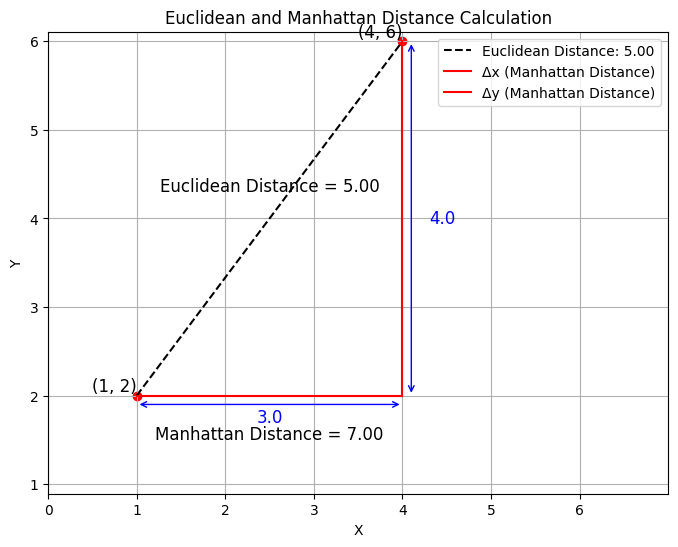

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# 定义两个点的坐标
point1 = np.array([1, 2])
point2 = np.array([4, 6])

# 计算欧氏距离
euclidean_distance = np.sqrt((point2[0] - point1[0])**2 + (point2[1] - point1[1])**2)

# 计算曼哈顿距离
manhattan_distance = np.abs(point2[0] - point1[0]) + np.abs(point2[1] - point1[1])

# 绘制图示
plt.figure(figsize=(8, 6))

# 画出两个点
plt.scatter([point1[0], point2[0]], [point1[1], point2[1]], color='red')

# 添加两个点的坐标标签
plt.text(point1[0], point1[1], f'({point1[0]}, {point1[1]})', fontsize=12, ha='right', va='bottom')
plt.text(point2[0], point2[1], f'({point2[0]}, {point2[1]})', fontsize=12, ha='right', va='bottom')

# 画出两点之间的直线（欧氏距离）
plt.plot([point1[0], point2[0]], [point1[1], point2[1]], 'k--', label=f'Euclidean Distance: {euclidean_distance:.2f}')

# 添加欧氏距离的标注
plt.text((point1[0] + point2[0]) / 2, (point1[1] + point2[1]) / 2 + 0.3, f'Euclidean Distance = {euclidean_distance:.2f}', fontsize=12, ha='center')

# 添加点到点之间的水平和垂直线段（曼哈顿距离）
plt.plot([point1[0], point2[0]], [point1[1], point1[1]], 'r-', label='Δx (Manhattan Distance)')
plt.plot([point2[0], point2[0]], [point1[1], point2[1]], 'r-', label='Δy (Manhattan Distance)')

# 添加曼哈顿距离的标注
plt.text((point1[0] + point2[0]) / 2, point1[1] - 0.5, f'Manhattan Distance = {manhattan_distance:.2f}', fontsize=12, ha='center')

# 添加辅助线和长度标注（稍微偏移）
offset = 0.1
vertical_offset = -0.1  # 垂直偏移量，用于将x轴的辅助线向下移动
plt.annotate('', xy=(point1[0], point1[1] + vertical_offset), xytext=(point2[0], point1[1] + vertical_offset),
             arrowprops=dict(arrowstyle='<->', color='blue'))
plt.annotate('', xy=(point2[0] + offset, point1[1]), xytext=(point2[0] + offset, point2[1]),
             arrowprops=dict(arrowstyle='<->', color='blue'))
plt.text((point1[0] + point2[0]) / 2, point1[1] + vertical_offset - 0.2, f'{np.abs(point2[0] - point1[0]):.1f}', fontsize=12, color='blue', ha='center')
plt.text(point2[0] + offset + 0.2, (point1[1] + point2[1]) / 2, f'{np.abs(point2[1] - point1[1]):.1f}', fontsize=12, color='blue', va='center')

# 设置图形属性
plt.title('Euclidean and Manhattan Distance Calculation')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.axis('equal')  # 让x轴和y轴相等
plt.xticks(np.arange(0, 7, 1))  # 设置x轴的刻度和步长
plt.yticks(np.arange(0, 7, 1))  # 设置y轴的刻度和步长
plt.xlim(0, 7)  # 调整x轴的范围
plt.ylim(0, 7)  # 调整y轴的范围

plt.legend()
plt.show()

为保障距离测算的正确性，需要保证数据集的维度一致。因此，需要将数据集的维度进行统一。即，归一化或标准化处理

## 特征工程
### 归一化和标准化
作用：统一量纲

归一化：将数据缩放到[0,1]区间，即最大最小值归一化  
优点：避免数据量纲差异  
缺点：容易受到极端值的影响  

标准化：将数据缩放到均值为0，方差为1的正态分布，即Z-score标准化  
优点：适用于各种算法，减少异常值的影响  
缺点：不像归一化只在[0,1]区间，不够直观  

### 归一化（Normalization）

归一化的公式为：

$$
\text{Normalized } x = \frac{x - \min(x)}{\max(x) - \min(x)}
$$

### 标准化（Standardization）

标准化的公式为：

$$
\text{Standardized } x = \frac{x - \mu(x)}{\sigma(x)}
$$

其中，$\mu(x)$ 是 $x$ 的平均值，$\sigma(x)$ 是 $x$ 的标准差。




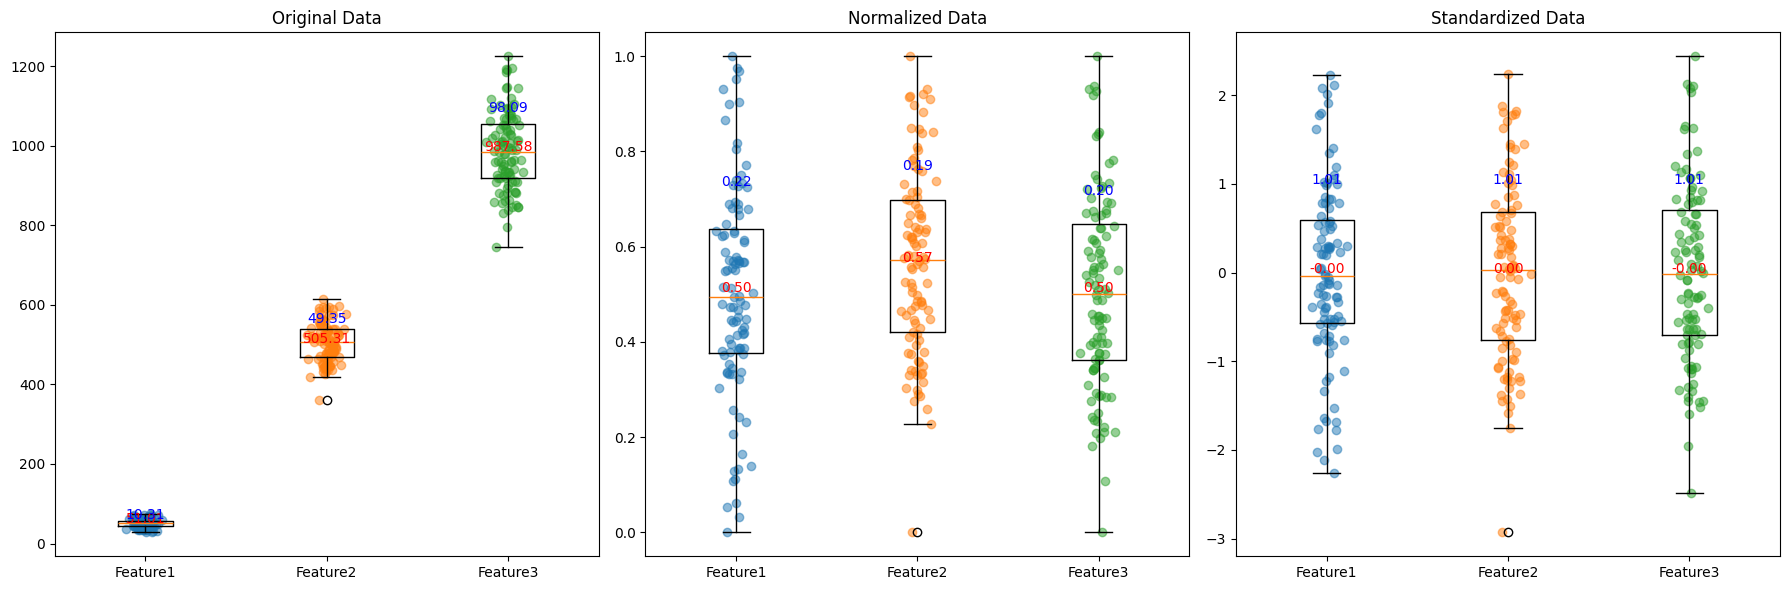

In [15]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt

# 生成示例数据集
np.random.seed(0)
data = np.random.randn(100, 3) * [10, 50, 100] + [50, 500, 1000]
df = pd.DataFrame(data, columns=['Feature1', 'Feature2', 'Feature3'])

# 归一化
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df)
df_normalized = pd.DataFrame(normalized_data, columns=['Feature1', 'Feature2', 'Feature3'])

# 标准化
scaler = StandardScaler()
standardized_data = scaler.fit_transform(df)
df_standardized = pd.DataFrame(standardized_data, columns=['Feature1', 'Feature2', 'Feature3'])

# 绘制原始数据、归一化数据和标准化数据的比较图
plt.figure(figsize=(18, 6))

# 原始数据
plt.subplot(1, 3, 1)
plt.title('Original Data')
plt.boxplot(df.values)
plt.xticks([1, 2, 3], ['Feature1', 'Feature2', 'Feature3'])
for i in range(df.shape[1]):
    y = df.iloc[:, i]
    x = np.random.normal(i + 1, 0.04, size=len(y))
    plt.scatter(x, y, alpha=0.5)
    plt.text(i + 1, y.mean(), f'{y.mean():.2f}', horizontalalignment='center', color='red')
    plt.text(i + 1, y.mean() + y.std(), f'{y.std():.2f}', horizontalalignment='center', color='blue')

# 归一化数据
plt.subplot(1, 3, 2)
plt.title('Normalized Data')
plt.boxplot(df_normalized.values)
plt.xticks([1, 2, 3], ['Feature1', 'Feature2', 'Feature3'])
for i in range(df_normalized.shape[1]):
    y = df_normalized.iloc[:, i]
    x = np.random.normal(i + 1, 0.04, size=len(y))
    plt.scatter(x, y, alpha=0.5)
    plt.text(i + 1, y.mean(), f'{y.mean():.2f}', horizontalalignment='center', color='red')
    plt.text(i + 1, y.mean() + y.std(), f'{y.std():.2f}', horizontalalignment='center', color='blue')

# 标准化数据
plt.subplot(1, 3, 3)
plt.title('Standardized Data')
plt.boxplot(df_standardized.values)
plt.xticks([1, 2, 3], ['Feature1', 'Feature2', 'Feature3'])
for i in range(df_standardized.shape[1]):
    y = df_standardized.iloc[:, i]
    x = np.random.normal(i + 1, 0.04, size=len(y))
    plt.scatter(x, y, alpha=0.5)
    plt.text(i + 1, y.mean(), f'{y.mean():.2f}', horizontalalignment='center', color='red')
    plt.text(i + 1, y.mean() + y.std(), f'{y.std():.2f}', horizontalalignment='center', color='blue')

plt.tight_layout()
plt.show()


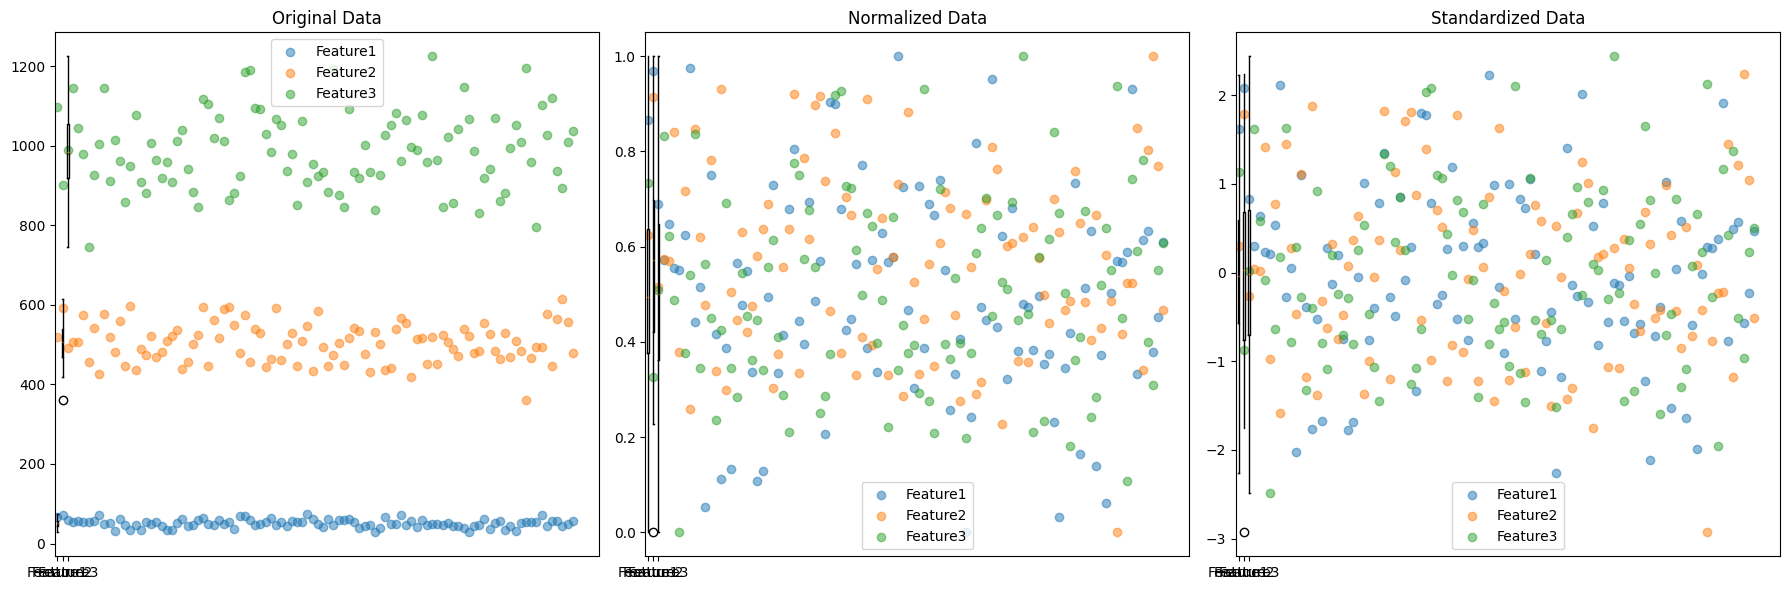

In [14]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt

# 生成示例数据集
np.random.seed(0)
data = np.random.randn(100, 3) * [10, 50, 100] + [50, 500, 1000]
df = pd.DataFrame(data, columns=['Feature1', 'Feature2', 'Feature3'])

# 归一化
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df)
df_normalized = pd.DataFrame(normalized_data, columns=['Feature1', 'Feature2', 'Feature3'])

# 标准化
scaler = StandardScaler()
standardized_data = scaler.fit_transform(df)
df_standardized = pd.DataFrame(standardized_data, columns=['Feature1', 'Feature2', 'Feature3'])

# 绘制原始数据、归一化数据和标准化数据的比较图
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.title('Original Data')
plt.boxplot(df.values)
plt.xticks([1, 2, 3], ['Feature1', 'Feature2', 'Feature3'])
plt.scatter(np.arange(1, len(df) + 1), df.values[:, 0], alpha=0.5, label='Feature1')
plt.scatter(np.arange(1, len(df) + 1), df.values[:, 1], alpha=0.5, label='Feature2')
plt.scatter(np.arange(1, len(df) + 1), df.values[:, 2], alpha=0.5, label='Feature3')
plt.legend()

plt.subplot(1, 3, 2)
plt.title('Normalized Data')
plt.boxplot(df_normalized.values)
plt.xticks([1, 2, 3], ['Feature1', 'Feature2', 'Feature3'])
plt.scatter(np.arange(1, len(df_normalized) + 1), df_normalized.values[:, 0], alpha=0.5, label='Feature1')
plt.scatter(np.arange(1, len(df_normalized) + 1), df_normalized.values[:, 1], alpha=0.5, label='Feature2')
plt.scatter(np.arange(1, len(df_normalized) + 1), df_normalized.values[:, 2], alpha=0.5, label='Feature3')
plt.legend()

plt.subplot(1, 3, 3)
plt.title('Standardized Data')
plt.boxplot(df_standardized.values)
plt.xticks([1, 2, 3], ['Feature1', 'Feature2', 'Feature3'])
plt.scatter(np.arange(1, len(df_standardized) + 1), df_standardized.values[:, 0], alpha=0.5, label='Feature1')
plt.scatter(np.arange(1, len(df_standardized) + 1), df_standardized.values[:, 1], alpha=0.5, label='Feature2')
plt.scatter(np.arange(1, len(df_standardized) + 1), df_standardized.values[:, 2], alpha=0.5, label='Feature3')
plt.legend()

plt.tight_layout()
plt.show()


生成示例数据集：我们生成了一个包含3个特征的数据集，每个特征的尺度不同。  
归一化：使用 MinMaxScaler 将数据归一化到 [0, 1] 的范围内。  
标准化：使用 StandardScaler 将数据标准化为均值为0，标准差为1的分布。  
绘图：使用箱线图（box plot）展示归一化和标准化后的数据分布，以直观比较二者的区别。  

### 归一化原理

In [51]:
from sklearn.preprocessing import MinMaxScaler # 归一化模块

In [38]:
data = [[9, 8, 7], [6, 5, 4], [3, 2, 1]] # 加载

In [60]:
# 创建 MinMaxScaler 对象
trans = MinMaxScaler()
# 使用 fit 方法计算数据的最小值和最大值
trans.fit(data)

# MinMaxScaler().fit(data) 这个写法也可以

MinMaxScaler()

In [61]:
trans.data_max_

array([9., 8., 7.])

In [62]:
trans.data_min_

array([3., 2., 1.])

In [63]:
trans.transform(data) # 计算归一化后的矩阵，里面封装了归一化的公式

array([[1. , 1. , 1. ],
       [0.5, 0.5, 0.5],
       [0. , 0. , 0. ]])

实际应用

In [44]:
from sklearn.preprocessing import MinMaxScaler
trans.fit_transform(data) # fit_transform方法相当于执行了fit和transform两个方法

array([[1. , 1. , 1. ],
       [0.5, 0.5, 0.5],
       [0. , 0. , 0. ]])

### 标准化原理

In [66]:
from sklearn.preprocessing import StandardScaler # 标准化工具

In [67]:
data1 = [[9, 8, 7], [6, 5, 4], [3, 2, 1]] # 加载

In [68]:
# 创建 StandardScaler 对象
scaler = StandardScaler()

# 使用 fit 方法计算数据的均值和标准差
scaler.fit(data1)

# StandardScaler().fit(data) 这种写法也可以

StandardScaler()

In [69]:
# 打印计算出的均值和标准差
print("Mean values:", scaler.mean_)
print("Standard deviation values:", scaler.scale_)

Mean values: [6. 5. 4.]
Standard deviation values: [2.44948974 2.44948974 2.44948974]


In [70]:
# 使用 transform 方法将数据标准化
standardized_data = scaler.transform(data1)
# 打印标准化后的数据
print("Standardized data (first 5 rows):\n", standardized_data[:5])

Standardized data (first 5 rows):
 [[ 1.22474487  1.22474487  1.22474487]
 [ 0.          0.          0.        ]
 [-1.22474487 -1.22474487 -1.22474487]]


### 实际应用
### 标准化（Standardization）

标准化的公式为：

$$
\text{Standardized } x = \frac{x - \mu(x)}{\sigma(x)}
$$

其中，$\mu(x)$ 是 $x$ 的平均值，$\sigma(x)$ 是 $x$ 的标准差。

In [72]:
from sklearn.preprocessing import StandardScaler 
scaler.fit_transform(data1) # fit_transform方法相当于执行了fit和transform两个方法

array([[ 1.22474487,  1.22474487,  1.22474487],
       [ 0.        ,  0.        ,  0.        ],
       [-1.22474487, -1.22474487, -1.22474487]])

### 鸢尾花数据集
鸢尾花数据集介绍：
1. 鸢尾花数据集是一个 Multivariate 数据集，包含 150 条记录，每条记录有 4 个特征，4 个特征分别是：
   - sepal length (cm)
   - sepal width (cm)
   - petal length (cm)
   - petal width (cm)
2. 鸢尾花数据集的分类标签有 3 个：
   - Iris-setosa
   - Iris-versicolor
   - Iris-virginica

In [12]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.DESCR)
print("===================整个iris数据集的描述======================")
print(iris)
print("===================整个iris数据集的数据======================")
print(iris.data)
print("===================整个iris数据集的特征数据======================")
print(iris.target)
print("===================整个iris数据集的标签数据======================")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

### KNN应用
### 标准化（Standardization）

标准化的公式为：

$$
\text{Standardized } x = \frac{x - \mu(x)}{\sigma(x)}
$$

其中，$\mu(x)$ 是 $x$ 的平均值，$\sigma(x)$ 是 $x$ 的标准差。

In [23]:
# 导入数据模块、标准化数据模块、KNN算法模块
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
# 导入数据
iris = load_iris()
# 标准化特征值
std_iris_data = StandardScaler().fit_transform(iris.data)

print(std_iris_data)

[[-9.00681170e-01  1.01900435e+00 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00 -1.31979479e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.38535265e+00  3.28414053e-01 -1.39706395e+00 -1.31544430e+00]
 [-1.50652052e+00  9.82172869e-02 -1.28338910e+00 -1.31544430e+00]
 [-1.02184904e+00  1.24920112e+00 -1.34022653e+00 -1.31544430e+00]
 [-5.37177559e-01  1.93979142e+00 -1.16971425e+00 -1.05217993e+00]
 [-1.50652052e+00  7.88807586e-01 -1.34022653e+00 -1.18381211e+00]
 [-1.02184904e+00  7.88807586e-01 -1.28338910e+00 -1.31544430e+00]
 [-1.74885626e+00 -3.62176246e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00  9.82172869e-02 -1.28338910e+00 -1.44707648e+00]
 [-5.37177559e-01  1.47939788e+00 -1.28338910e+00 -1.31544430e+00]
 [-1.26418478e+00  7.88807586e-01 -1.22655167e+00 -1.31544430e+00]
 [-1.26418478e+00 -1.31979479e-01 -1.34022653e+00 -1.44707648e+00]
 [-1.87002413e+00 -1.31979479e-01 -1.51073881e+00 -1.44707648e+00]
 [-5.25060772e-02  2.16998818e+00 -1.45390138e+00 -1.31544430e

In [29]:
# 确定K值
knn = KNeighborsClassifier(n_neighbors=3)
# 创建KNN模型，将特征值与标签值传入封装的KNN的计算公式中
# 此处的knn将是训练好的模型，之后可以使用knn.predict()方法进行预测
knn.fit(std_iris_data, iris.target)


KNeighborsClassifier(n_neighbors=3)

In [32]:
# 此处的knn就是训练好的预测模型，注意不是knn.predict(),.predict()只是模型的方法之一。
y_predict = knn.predict(std_iris_data) 
sum(y_predict == iris.target) # 143/150

143

In [39]:
# 测试一下模型的预测能力
# 假定的新数据点，需要与iris数据集特征维度一致
new_data_point = [5.1, 3.5, 1.4, 0.2]  # 举例，需根据实际情况调整

# 标准化新数据点
new_data_point_scaled = StandardScaler().fit_transform([new_data_point])

# 预测新数据点的类别
predicted_class = knn.predict(new_data_point_scaled)

print("预测的类别为:", predicted_class)

预测的类别为: [1]


### KNN的优化

### 数据集划分
作用：预留数据对模型进行泛化能力测试。
1. 随机划分：随机抽取一定比例的数据作为测试集，剩余作为训练集。一般是2：8或者3：7。
2. 留一法：将数据集分为k份，每次留一份作为测试集，剩余作为训练集。
3. 留p法：将数据集分为k份，每次留p份作为测试集，剩余作为训练集。
4. 折叠交叉验证：将数据集分为k份，每次留一份作为测试集，剩余作为训练集。

计算机的随机数是伪随机数，使用的是线性同余算法或梅森旋转算法，所以每次得到的随机数都不一样  
只要种子不变，随机数永远都是相同的。  
可以用time.time()获取当前时间戳，作为种子，以解决伪随机的问题。

伪随机数的知识点：https://www.bilibili.com/video/BV1Xa4y1k7LU?p=92&vd_source=fe10ccc7906c6ec97625e8f7c8fa31ea

In [50]:
from sklearn.datasets import load_iris
# 导入随机划分、留一法、留p法、K折划分模块
from sklearn.model_selection import train_test_split, LeaveOneOut, LeavePOut, KFold

# 加载鸢尾花数据集
iris = load_iris()
X, y = iris.data, iris.target


In [46]:
# 1. 随机划分
# 这里的random_state参数用于设置随机数种子，确保每次划分的结果相同，以确保实验结果的可重复性。
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("随机划分:")
print("训练集数据形状:", X_train.shape, y_train.shape)
print("测试集数据形状:", X_test.shape, y_test.shape)
print()
print("训练集:")
for i in range(len(X_train)):
    print(f"样本{i}: 特征={X_train[i]}, 标签={y_train[i]}")
print("测试集:")
for i in range(len(X_test)):
    print(f"样本{i}: 特征={X_test[i]}, 标签={y_test[i]}")
print()



随机划分:
训练集数据形状: (120, 4) (120,)
测试集数据形状: (30, 4) (30,)

训练集:
样本0: 特征=[4.6 3.6 1.  0.2], 标签=0
样本1: 特征=[5.7 4.4 1.5 0.4], 标签=0
样本2: 特征=[6.7 3.1 4.4 1.4], 标签=1
样本3: 特征=[4.8 3.4 1.6 0.2], 标签=0
样本4: 特征=[4.4 3.2 1.3 0.2], 标签=0
样本5: 特征=[6.3 2.5 5.  1.9], 标签=2
样本6: 特征=[6.4 3.2 4.5 1.5], 标签=1
样本7: 特征=[5.2 3.5 1.5 0.2], 标签=0
样本8: 特征=[5.  3.6 1.4 0.2], 标签=0
样本9: 特征=[5.2 4.1 1.5 0.1], 标签=0
样本10: 特征=[5.8 2.7 5.1 1.9], 标签=2
样本11: 特征=[6.  3.4 4.5 1.6], 标签=1
样本12: 特征=[6.7 3.1 4.7 1.5], 标签=1
样本13: 特征=[5.4 3.9 1.3 0.4], 标签=0
样本14: 特征=[5.4 3.7 1.5 0.2], 标签=0
样本15: 特征=[5.5 2.4 3.7 1. ], 标签=1
样本16: 特征=[6.3 2.8 5.1 1.5], 标签=2
样本17: 特征=[6.4 3.1 5.5 1.8], 标签=2
样本18: 特征=[6.6 3.  4.4 1.4], 标签=1
样本19: 特征=[7.2 3.6 6.1 2.5], 标签=2
样本20: 特征=[5.7 2.9 4.2 1.3], 标签=1
样本21: 特征=[7.6 3.  6.6 2.1], 标签=2
样本22: 特征=[5.6 3.  4.5 1.5], 标签=1
样本23: 特征=[5.1 3.5 1.4 0.2], 标签=0
样本24: 特征=[7.7 2.8 6.7 2. ], 标签=2
样本25: 特征=[5.8 2.7 4.1 1. ], 标签=1
样本26: 特征=[5.2 3.4 1.4 0.2], 标签=0
样本27: 特征=[5.  3.5 1.3 0.3], 标签=0
样本28: 特征=[5.1 3.8 1.9 0.4]

随机划分：

优点：  
- 简单易用，不需要太多参数设置。  
- 可以灵活控制训练集和测试集的比例。   
 
缺点：  
- 随机性可能导致划分不稳定，不同的随机种子可能会得到不同的结果。  

适用情况：  
- 适用于大多数情况，特别是当数据量较大时。  

In [47]:
# 2. 留一法
loo = LeaveOneOut()
for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # 在这里可以使用X_train, X_test, y_train, y_test进行模型训练和评估
print("留一法:")
print("训练集数据形状:", X_train.shape, y_train.shape)
print("测试集数据形状:", X_test.shape, y_test.shape)
print()
print("训练集:")
for i in range(len(X_train)):
    print(f"样本{i}: 特征={X_train[i]}, 标签={y_train[i]}")
print("测试集:")
for i in range(len(X_test)):
    print(f"样本{i}: 特征={X_test[i]}, 标签={y_test[i]}")
print()

留一法:
训练集数据形状: (149, 4) (149,)
测试集数据形状: (1, 4) (1,)

训练集:
样本0: 特征=[5.1 3.5 1.4 0.2], 标签=0
样本1: 特征=[4.9 3.  1.4 0.2], 标签=0
样本2: 特征=[4.7 3.2 1.3 0.2], 标签=0
样本3: 特征=[4.6 3.1 1.5 0.2], 标签=0
样本4: 特征=[5.  3.6 1.4 0.2], 标签=0
样本5: 特征=[5.4 3.9 1.7 0.4], 标签=0
样本6: 特征=[4.6 3.4 1.4 0.3], 标签=0
样本7: 特征=[5.  3.4 1.5 0.2], 标签=0
样本8: 特征=[4.4 2.9 1.4 0.2], 标签=0
样本9: 特征=[4.9 3.1 1.5 0.1], 标签=0
样本10: 特征=[5.4 3.7 1.5 0.2], 标签=0
样本11: 特征=[4.8 3.4 1.6 0.2], 标签=0
样本12: 特征=[4.8 3.  1.4 0.1], 标签=0
样本13: 特征=[4.3 3.  1.1 0.1], 标签=0
样本14: 特征=[5.8 4.  1.2 0.2], 标签=0
样本15: 特征=[5.7 4.4 1.5 0.4], 标签=0
样本16: 特征=[5.4 3.9 1.3 0.4], 标签=0
样本17: 特征=[5.1 3.5 1.4 0.3], 标签=0
样本18: 特征=[5.7 3.8 1.7 0.3], 标签=0
样本19: 特征=[5.1 3.8 1.5 0.3], 标签=0
样本20: 特征=[5.4 3.4 1.7 0.2], 标签=0
样本21: 特征=[5.1 3.7 1.5 0.4], 标签=0
样本22: 特征=[4.6 3.6 1.  0.2], 标签=0
样本23: 特征=[5.1 3.3 1.7 0.5], 标签=0
样本24: 特征=[4.8 3.4 1.9 0.2], 标签=0
样本25: 特征=[5.  3.  1.6 0.2], 标签=0
样本26: 特征=[5.  3.4 1.6 0.4], 标签=0
样本27: 特征=[5.2 3.5 1.5 0.2], 标签=0
样本28: 特征=[5.2 3.4 1.4 0.2], 标

留一法（Leave One Out，LOO）：

优点：
- 利用了所有的数据进行训练和测试，每次都有一个样本作为测试集。
- 在数据量较小时，LOO可以提供更准确的估计。

缺点：
- 计算成本高，需要进行多次模型训练。
- 对计算资源要求较高，数据量较大时不太适用。

适用情况：
- 适用于数据量较小，对模型性能评估要求较高的情况。

In [48]:
# 3. 留p法
lpo = LeavePOut(p=2)
for train_index, test_index in lpo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # 在这里可以使用X_train, X_test, y_train, y_test进行模型训练和评估
print("留p法:")
print("训练集数据形状:", X_train.shape, y_train.shape)
print("测试集数据形状:", X_test.shape, y_test.shape)
print()
print("训练集:")
for i in range(len(X_train)):
    print(f"样本{i}: 特征={X_train[i]}, 标签={y_train[i]}")
print("测试集:")
for i in range(len(X_test)):
    print(f"样本{i}: 特征={X_test[i]}, 标签={y_test[i]}")
print()


留p法:
训练集数据形状: (148, 4) (148,)
测试集数据形状: (2, 4) (2,)

训练集:
样本0: 特征=[5.1 3.5 1.4 0.2], 标签=0
样本1: 特征=[4.9 3.  1.4 0.2], 标签=0
样本2: 特征=[4.7 3.2 1.3 0.2], 标签=0
样本3: 特征=[4.6 3.1 1.5 0.2], 标签=0
样本4: 特征=[5.  3.6 1.4 0.2], 标签=0
样本5: 特征=[5.4 3.9 1.7 0.4], 标签=0
样本6: 特征=[4.6 3.4 1.4 0.3], 标签=0
样本7: 特征=[5.  3.4 1.5 0.2], 标签=0
样本8: 特征=[4.4 2.9 1.4 0.2], 标签=0
样本9: 特征=[4.9 3.1 1.5 0.1], 标签=0
样本10: 特征=[5.4 3.7 1.5 0.2], 标签=0
样本11: 特征=[4.8 3.4 1.6 0.2], 标签=0
样本12: 特征=[4.8 3.  1.4 0.1], 标签=0
样本13: 特征=[4.3 3.  1.1 0.1], 标签=0
样本14: 特征=[5.8 4.  1.2 0.2], 标签=0
样本15: 特征=[5.7 4.4 1.5 0.4], 标签=0
样本16: 特征=[5.4 3.9 1.3 0.4], 标签=0
样本17: 特征=[5.1 3.5 1.4 0.3], 标签=0
样本18: 特征=[5.7 3.8 1.7 0.3], 标签=0
样本19: 特征=[5.1 3.8 1.5 0.3], 标签=0
样本20: 特征=[5.4 3.4 1.7 0.2], 标签=0
样本21: 特征=[5.1 3.7 1.5 0.4], 标签=0
样本22: 特征=[4.6 3.6 1.  0.2], 标签=0
样本23: 特征=[5.1 3.3 1.7 0.5], 标签=0
样本24: 特征=[4.8 3.4 1.9 0.2], 标签=0
样本25: 特征=[5.  3.  1.6 0.2], 标签=0
样本26: 特征=[5.  3.4 1.6 0.4], 标签=0
样本27: 特征=[5.2 3.5 1.5 0.2], 标签=0
样本28: 特征=[5.2 3.4 1.4 0.2], 标

留p法（Leave P Out，LPO）：

优点：
- 可以灵活控制每次留出的样本数量。
- 相对于LOO，计算成本较低。

缺点：
- 当p值较大时，计算成本仍然较高。
- 对计算资源要求较高，数据量较大时不太适用。

适用情况：
- 适用于数据量较小，但比LOO更节省计算资源的情况。

In [49]:
# 4. 折叠交叉验证
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # 在这里可以使用X_train, X_test, y_train, y_test进行模型训练和评估
print("折叠交叉验证:")
print("训练集数据形状:", X_train.shape, y_train.shape)
print("测试集数据形状:", X_test.shape, y_test.shape)
print()
print("训练集:")
for i in range(len(X_train)):
    print(f"样本{i}: 特征={X_train[i]}, 标签={y_train[i]}")
print("测试集:")
for i in range(len(X_test)):
    print(f"样本{i}: 特征={X_test[i]}, 标签={y_test[i]}")
print()

折叠交叉验证:
训练集数据形状: (120, 4) (120,)
测试集数据形状: (30, 4) (30,)

训练集:
样本0: 特征=[5.1 3.5 1.4 0.2], 标签=0
样本1: 特征=[4.7 3.2 1.3 0.2], 标签=0
样本2: 特征=[4.6 3.1 1.5 0.2], 标签=0
样本3: 特征=[5.  3.6 1.4 0.2], 标签=0
样本4: 特征=[5.4 3.9 1.7 0.4], 标签=0
样本5: 特征=[4.6 3.4 1.4 0.3], 标签=0
样本6: 特征=[5.  3.4 1.5 0.2], 标签=0
样本7: 特征=[4.4 2.9 1.4 0.2], 标签=0
样本8: 特征=[4.9 3.1 1.5 0.1], 标签=0
样本9: 特征=[5.4 3.7 1.5 0.2], 标签=0
样本10: 特征=[4.8 3.4 1.6 0.2], 标签=0
样本11: 特征=[4.8 3.  1.4 0.1], 标签=0
样本12: 特征=[4.3 3.  1.1 0.1], 标签=0
样本13: 特征=[5.7 4.4 1.5 0.4], 标签=0
样本14: 特征=[5.4 3.9 1.3 0.4], 标签=0
样本15: 特征=[5.1 3.5 1.4 0.3], 标签=0
样本16: 特征=[5.7 3.8 1.7 0.3], 标签=0
样本17: 特征=[5.1 3.8 1.5 0.3], 标签=0
样本18: 特征=[4.6 3.6 1.  0.2], 标签=0
样本19: 特征=[5.1 3.3 1.7 0.5], 标签=0
样本20: 特征=[4.8 3.4 1.9 0.2], 标签=0
样本21: 特征=[5.  3.  1.6 0.2], 标签=0
样本22: 特征=[5.  3.4 1.6 0.4], 标签=0
样本23: 特征=[5.2 3.5 1.5 0.2], 标签=0
样本24: 特征=[5.2 3.4 1.4 0.2], 标签=0
样本25: 特征=[4.7 3.2 1.6 0.2], 标签=0
样本26: 特征=[4.8 3.1 1.6 0.2], 标签=0
样本27: 特征=[5.4 3.4 1.5 0.4], 标签=0
样本28: 特征=[5.2 4.1 1.5 0.

In [44]:
import numpy as np

# 生成虚拟数据集
X = np.array([[i] for i in range(10)])  # 特征
y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])  # 标签，假设有两类

# 打印原始数据集
print("原始数据集:")
for i in range(10):
    print(f"样本{i}: 特征={X[i]}, 标签={y[i]}")
print()

# 划分数据集
from sklearn.model_selection import train_test_split

# 不设置随机种子
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("不设置随机种子:")
print("训练集:")
for i in range(len(X_train)):
    print(f"样本{i}: 特征={X_train[i]}, 标签={y_train[i]}")
print("测试集:")
for i in range(len(X_test)):
    print(f"样本{i}: 特征={X_test[i]}, 标签={y_test[i]}")
print()

# 设置随机种子为1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("设置随机种子为1:")
print("训练集:")
for i in range(len(X_train)):
    print(f"样本{i}: 特征={X_train[i]}, 标签={y_train[i]}")
print("测试集:")
for i in range(len(X_test)):
    print(f"样本{i}: 特征={X_test[i]}, 标签={y_test[i]}")


原始数据集:
样本0: 特征=[0], 标签=0
样本1: 特征=[1], 标签=0
样本2: 特征=[2], 标签=0
样本3: 特征=[3], 标签=0
样本4: 特征=[4], 标签=0
样本5: 特征=[5], 标签=1
样本6: 特征=[6], 标签=1
样本7: 特征=[7], 标签=1
样本8: 特征=[8], 标签=1
样本9: 特征=[9], 标签=1

不设置随机种子:
训练集:
样本0: 特征=[6], 标签=1
样本1: 特征=[2], 标签=0
样本2: 特征=[5], 标签=1
样本3: 特征=[3], 标签=0
样本4: 特征=[9], 标签=1
样本5: 特征=[4], 标签=0
样本6: 特征=[7], 标签=1
样本7: 特征=[0], 标签=0
测试集:
样本0: 特征=[8], 标签=1
样本1: 特征=[1], 标签=0

设置随机种子为1:
训练集:
样本0: 特征=[6], 标签=1
样本1: 特征=[4], 标签=0
样本2: 特征=[0], 标签=0
样本3: 特征=[3], 标签=0
样本4: 特征=[1], 标签=0
样本5: 特征=[7], 标签=1
样本6: 特征=[8], 标签=1
样本7: 特征=[5], 标签=1
测试集:
样本0: 特征=[2], 标签=0
样本1: 特征=[9], 标签=1


折叠交叉验证（k-Fold Cross-Validation）：

优点：
- 计算成本相对较低，尤其是当k值较小时。
- 对模型性能的评估更稳健，可以减少随机性带来的影响。

缺点：
- 当数据量较小时，可能会导致每折中的样本数量较少，模型评估的稳定性降低。

适用情况：
- 适用于大多数情况，尤其是当数据量较大时。

### KNN的模型评估

In [15]:
# 划分数据集的KNN实现
from sklearn.datasets import load_iris # 导入数据集
from sklearn.preprocessing import StandardScaler # 标准化
from sklearn.model_selection import train_test_split # 划分数据集
from sklearn.neighbors import KNeighborsClassifier # KNN

# 加载数据集
iris = load_iris()
X = iris.data
y = iris.target

# 划分数据集
# test_size=0.2表示测试集占数据集的20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 标准化训练集和测试集
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

# 创建KNN模型
# n_neighbors表示K值
knn_clf = KNeighborsClassifier(n_neighbors=3)

# 训练模型
knn_clf.fit(X_train, y_train)

# 测试集预测
print("模型预测结果：", knn_clf.predict(X_test)) # 使用.predict进行预测

# 模型评估
print("模型准确率：{:.3f}".format(knn_clf.score(X_test, y_test))) # 使用.score评估模型准确率





模型预测结果： [2 1 0 2 0 2 0 1 1 1 1 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]
模型准确率：0.967


### KNN的进一步优化

In [15]:
# K值过小：容易受到噪音的影响，容易欠拟合
# K值过大：容易受到样本均衡的影响，容易过拟合
# 样本均衡：样本数量与类别数量相等

# GridSearchCV：网格搜索
from sklearn.datasets import load_iris # 导入数据集
from sklearn.preprocessing import StandardScaler # 标准化
from sklearn.model_selection import train_test_split # 划分数据集
from sklearn.neighbors import KNeighborsClassifier # KNN分类器
from sklearn.model_selection import GridSearchCV # 网格搜索
import joblib # 模型持久化模块,保存模型，加载模型

# 导入数据集
iris = load_iris()
X = iris.data
y = iris.target

# 划分数据集
# test_size：测试集占比，random_state：随机种子
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

# 标准化训练集和测试集
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

# 创建KNN分类器
knn_clf = KNeighborsClassifier()

# 设置参数K值
# n_neighbors：K值，weights：权重
# uniform表示每个邻居的投票权重相等，distance表示距离
param_grid = {"n_neighbors": [i for i in range(1, 11)], "weights": ["uniform", "distance"]}
knn_clf = GridSearchCV(knn_clf, param_grid, cv=5) # 创建网格搜索对象，cv：交叉验证次数

# 训练
knn_clf.fit(X_train, y_train)

# 验证集模型评估
print("验证集模型准确率：{:.3f}".format(knn_clf.best_score_)) # 在验证集上的最佳分数

# 测试
print("模型预测结果：", knn_clf.predict(X_test)) # 使用.predict进行预测

# 测试集模型评估
print("测试集模型准确率：{:.3f}".format(knn_clf.score(X_test, y_test))) # 使用.score评估模型准确率

# K值评估
print("最佳参数：", knn_clf.best_params_)

# 最终结果
print(knn_clf.best_estimator_) # 最佳模型

# 保存模型
joblib.dump(knn_clf, 'knn.pkl')


验证集模型准确率：0.942
模型预测结果： [1 2 1 2 0 1 1 2 1 1 1 0 0 0 2 1 0 1 2 2 1 0 2 0 1 1 0 1 2 2]
测试集模型准确率：0.967
最佳参数： {'n_neighbors': 3, 'weights': 'distance'}
KNeighborsClassifier(n_neighbors=3, weights='distance')


['knn.pkl']

In [16]:
# 加载与测试
from sklearn.datasets import load_iris # 导入数据集
from sklearn.preprocessing import StandardScaler # 标准化
from sklearn.model_selection import train_test_split # 划分数据集
from sklearn.neighbors import KNeighborsClassifier # KNN分类器
from sklearn.model_selection import GridSearchCV # 网格搜索
import joblib # 模型持久化模块,保存模型，加载模型

# 导入数据集
iris = load_iris()
X = iris.data
y = iris.target

# 划分数据集
# test_size：测试集占比，random_state：随机种子
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

# 标准化训练集和测试集
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

# 加载模型
knn_clf = joblib.load('knn.pkl')


print("验证集模型准确率：{:.3f}".format(knn_clf.best_score_)) # 在验证集上的最佳分数

# 测试
print("模型预测结果：", knn_clf.predict(X_test)) # 使用.predict进行预测

# 测试集模型评估
print("测试集模型准确率：{:.3f}".format(knn_clf.score(X_test, y_test))) # 使用.score评估模型准确率

# K值评估
print("最佳参数：", knn_clf.best_params_)

# 最终结果
print(knn_clf.best_estimator_) # 最佳模型

验证集模型准确率：0.942
模型预测结果： [1 2 1 2 0 1 1 2 1 1 1 0 0 0 2 1 0 1 2 2 1 0 2 0 1 1 0 1 2 2]
测试集模型准确率：0.967
最佳参数： {'n_neighbors': 3, 'weights': 'distance'}
KNeighborsClassifier(n_neighbors=3, weights='distance')


: 